# [AI-ML: Machine Learning](https://csed.acm.org/final-report/)
## CS Core: Session 4

CS Core Topics

<ul>
    <li style="list-style-type: none;">8. Basic neural networks
        <ul>
            <li style="list-style-type: none;">a. Fundamentals of understanding how neural networks work and their training process, without details of the calculations</li>
            <li style="list-style-type: none;">b. Basic introduction to generative neural networks (e.g., large language models)</li>
        </ul>
    </li>
    <li style="list-style-type: none;">9. Ethics for Machine Learning
        <ul>
            <li style="list-style-type: none;">a. Focus on real data, real scenarios, and case studies</li>
            <li style="list-style-type: none;">b. Dataset/algorithmic/evaluation bias and unintended consequences</li>
        </ul>
    </li>
</ul>

## Basic Neural Networks

From the perspective of *feature engineering*, we see the possibility of deriving helpful features from simple, raw features that can then boost the performance of learning.  This idea is core to the AI approach of [Connectionism](https://en.wikipedia.org/wiki/Connectionism), where intelligence can be seen as emergent from the combined, layered computation of simple computational units.  Just as neurons in the brain process sensory input from raw data to higher-level understanding of ones experiences, neural computation seeks to learn intelligent reasoning and behavior from the combined learning of simple computational units called *artificial neurons*.  This is in contrast to the [Logicist](https://en.wikipedia.org/wiki/Logicism) who believes that all Mathematics and our understanding of intelligence is reducible to logic.  Whereas the logicist approach starts top-down with higher-order logic axioms, the connectionist works bottom-up, seeking to model basic, simple computations that, when networked, can learn to achieve high performance at difficult tasks.

### Natural and Artificial Neurons

A [Neuron](https://en.wikipedia.org/wiki/Neuron), depicted in the figure below, allow electrochemical signals that are input through dendrites to excite the neuron so as to send an electrochemical pulse as output along its single axon which, through synapses, signals other dendrites of other neurons, allowing for a network of electrochemical computations.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/500px-Blausen_0657_MultipolarNeuron.png" alt="Anatomy of a Multipolar Neuron from Wikipedia article" width="800"/>

Source: [https://en.wikipedia.org/wiki/Neuron](https://en.wikipedia.org/wiki/Neuron)

Relative to the complexity of a natural neuron cell, the [artificial neuron](https://en.wikipedia.org/wiki/Artificial_neuron) is a relatively simple mathematical model.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png" alt="Artificial Neuron" width="800" style="background-color:white;padding:5px;"/>

Source: [https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png](https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png)

Inputs are multiplied by learned weights (positive or negative) and are summed.  This net input then passes through a nonlinear activation function that computes an output.  Outputs are typically from -1 to 1 or from 0 to 1.

Often there is a "bias" input, depicted as a constant input of 1 with its own weight, or as a threshold value for the nonlinear activation function (which is effectively the negative weight for such a bias input).  Different learned weights compute different nonlinear functions.  Consider an artificial neuron with a logistic (a.k.a. sigmoid) activation function $\sigma(z) \equiv \frac{1}{1+e^{-z}}$.  With inputs $x_j$, weights $w_j$, and bias $b$, the output of this sigmoid unit is $\frac{1}{1+\exp(-\sum_j w_j x_j-b)}$.  

This form is the same as used in [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)!  Learning the weights and bias of a single artificial sigmoid neuron is equivalent to learning the coefficients and intercept, respectively, of a logistic function in _logistic regression_.  Neural network learning for a single sigmoid neuron is the same as performing logistic regression.

This gives us a basis for understanding what a neuron can and cannot do.  A one-dimensional logistic regression fits a sigmoid to data.  A value of $\geq .5$ predicts 1, and a value $< .5$ predicts 0.  In one dimension, logistic regression finds a threshold value for which all values are the same 0/1 on either side of a learned threshold value.

In two dimensions with two inputs, a logistic regression defines a line separating 0/1 predictions.  In three dimensions with three inputs, a logistic regression defines a plane separating 0/1 predictions.  Although the function that expresses the probability of the output is sigmoidal in shape, the threshold division is always a _linear_ function of the inputs.  That is why it is said that functions expressible by artificial neurons are _linearly separable_.  We can set a threshold value, draw a line, define a plane, etc. to separate our two classifications.  That works sometimes, e.g. the OR function that is true (1) if and only if at least one input is true (1). False is represented by 0.

| x1 | x2 | y = x1 OR x2 |
| -- | -- | ------------ |
|  0 |  0 |            0 |
|  0 |  1 |            1 |
|  1 |  0 |            1 |
|  1 |  1 |            1 |


In [19]:
# Imports

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor


Intercept: [-0.49187356]
Coefficients: [[2.03443073 2.03443073]]
Predictions: [0 1 1 1]


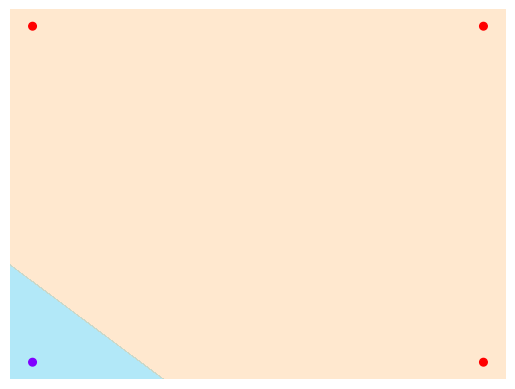

In [32]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

df = pd.DataFrame(data=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]], columns=['x1', 'x2', 'y'])
X = df[['x1', 'x2']]
y = df['y']
model = LogisticRegression(C=10)  # Higher C weakens the regularization to avoid underfitting here.
model.fit(X.values, y.values)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

# We can visualize the model by using VanderPlas' visualization code
# modified to _assume the model is already fit_:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

This also works for the AND function:

| x1 | x2 | y = x1 AND x2 |
| -- | -- | ------------- |
|  0 |  0 |             0 |
|  0 |  1 |             0 |
|  1 |  0 |             0 |
|  1 |  1 |             1 |

Intercept: [-3.57643092]
Coefficients: [[2.03395158 2.03395158]]
Predictions: [0 0 0 1]


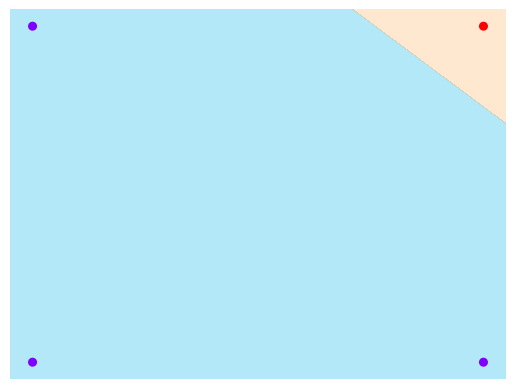

In [ ]:
df = pd.DataFrame(data=[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]], columns=['x1', 'x2', 'y'])
X = df[['x1', 'x2']]
y = df['y']
model.fit(X.values, y.values)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()


However, there is no way to learn a linear boundary to correctly classify the XOR (exclusive or) function which is true if and only if either input x1 or input x2 is true (but not both).

| x1 | x2 | y = x1 XOR x2 |
| -- | -- | ------------- |
|  0 |  0 |             0 |
|  0 |  1 |             1 |
|  1 |  0 |             1 |
|  1 |  1 |             0 |

Intercept: [0.]
Coefficients: [[0. 0.]]
Predictions: [0 0 0 0]


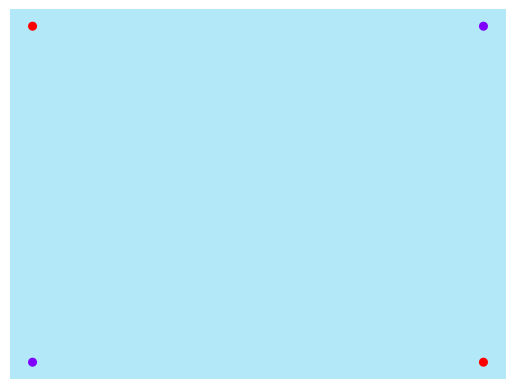

In [36]:
df = pd.DataFrame(data=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]], columns=['x1', 'x2', 'y'])
X = df[['x1', 'x2']]
y = df['y']
model.fit(X.values, y.values)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

At best, logistic regression might classify 3 of 4 points correctly, but it does not have the expressive power to correctly classify such a _linearly inseparable_ function.

Since you can think of an artificial neuron as being a simple logistic regression, we can see that an artificial neuron is restricted to only learning simple linearly separable functions (e.g. AND, OR, NOT).

However, we can express XOR as a compound expression of linearly separable functions.  Consider that ```x1 XOR x2``` is equivalent to ```(x1 OR x2) AND NOT (x1 AND x2)```.  The two parenthesized expressions can each be learned by single artificial neurons.  ```NOT (x1 AND x2)``` that reverses the truth values of ```(x1 AND x2)``` can also be learned.  The full AND combination can be learned in the second layer of a neural network where the OR and NOT AND portions are learned in the first layer.

| x1 | x2 | x1 OR x2 | x1 AND x2 | (x1 OR x2) AND NOT (x1 AND x2) | x1 XOR x2 |
|:--:|:--:|:--------:|:---------:|:------------------------------:|:---------:|
| 0  | 0  | 0        | 0         | 0                              | 0         | 
| 0  | 1  | 1        | 0         | 1                              | 1         | 
| 1  | 0  | 1        | 0         | 1                              | 1         | 
| 1  | 1  | 1        | 1         | 0                              | 0         | 

This means that a network of simple neurons can learn more complex functions by passing simple outputs as inputs to other units in what is called a _multilayer feedforward network_.  Such neural networks are a low-bias, high-variance modeling method, and have shown excellent performance for a wide variety of predictive tasks, although it is hard to say what exactly has been learned by such networks, as we cannot easily gain insight from a collection of weights and bias values.

Let us play with a simple neural network and watch something like XOR being learned using this link to the [Tensorflow Playground](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=3,1&seed=0.73705&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). (Click on the link and press the play button.)

In this demonstration, we have two classes visualized as orange and blue.  Each artificial neuron "unit" in the multilayer feedforward network has a small visualization of what each unit computes as a function of the original units.  Through each layer we can see the combinations form more complex nonlinear shapes, which leads us to an important insight:

**Each layer of a neural network engineers the input features for the next layer.**  One of the appeals to neural networks (NNs) is that they seek to learn internal representations of the input data that are helpful for producing good predictive output.  One might think one should always go to NNs as one's easy hands-free technique to model anything.  However, there are a few points to temper one's enthusiasm:

* It is often said that "A neural network is the second-best way to solve any problem."   What is generally meant is that greater insight to a problem can often suggest a simpler, better solution.  As we saw in our comparison of decision tree regression versus polynomial regression, knowing the form of the solution suggests better and often simpler approaches.  It is often best to work with the simplest model that yields acceptable results, as it is more easily explained, understood, debugged, etc.
* Neural networks can be notoriously difficult to train successfully with many architectural and learning parameter choices yielding very different results.  We see the many shining successes, but people generally don't share the many convergences failures or note the many hours spent carefully engineering the successes.  With this great versatility and power also comes great complexity and many possible ways the NN approach can fail or yield [fragile successes](https://www.nature.com/articles/d41586-019-03013-5).

Still, NNs are an important tool in one's toolset, and deep neural networks (DNNs) are popular in many applications.  (A _deep neural network_ is simply a neural network with many layers in which to learn complex internal representations of data.)

## Neural Networks with Scikit Learn

We will first demonstrate the use of Scikit Learn's Neural Network Classifier "[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)" in learning the XOR example from above.

In [37]:
model = MLPClassifier(max_iter=1000, random_state=0)
model.fit(X.values, y.values)
print('Predictions:', model.predict([[0, 0], [0, 1], [1, 0], [1, 1]]))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()


Predictions: [0 1 1 0]


That was easy enough.  Now observe performance of the MLPClassifier on a grid-based clustering problem:


In [43]:
df = pd.read_csv('grid-clusters.csv', index_col='id')

# Create a normalization of x1, x2
input_cols = ['x1','x2']
x = df[input_cols].values  # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=input_cols)

# Create a mapping of all unique y class/category values to 0, 1, ...
classes = df.y.unique()
class_map = {c : i for i, c in enumerate(classes)}
df_scaled['y'] = df['y'].map(class_map)

# Divide into train, test sets
X = df_scaled[['x1', 'x2']]
y = df_scaled['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

model = MLPClassifier(random_state=0)
model.fit(X.values, y.values)

y_predict = model.predict(X_train.values)
acc = accuracy_score(y_train, y_predict)
print('Accuracy =', acc)

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

Accuracy = 0.9836


With default parameters, we achieve successful results, but the computation is costly.  Some argue that the main reason that we have seen a rise in the popularity of NNs in recent years is that we finally have machines capable of storing sufficient data and performing costly operations quickly (e.g. using Graphical Processing Units (GPUs) designed for gaming to perform highly parallelized NN computations).  Our techniques have indeed improved since the disappointing boom and bust of NN research in the 1980s, but the main difference between then and now is bigger data, bigger memory to hold it, and faster machines to learn from it.

When performing a classification for more than two classes, the common approach is to have a "softmax" output that has a separate output unit for each class, with each output indicating the probability that the input will belong to that class.  When a prediction is called upon, the output unit with the highest probability is selected for the classification prediction.  Let's see this approach applied to synthetic "blobs" data.

Class 0 testing accuracy:  0.928
Class 1 testing accuracy:  0.974
Class 2 testing accuracy:  0.946


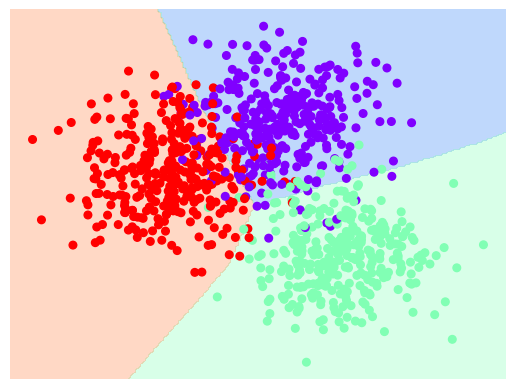

In [ ]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

num_classes = 3
X, y = make_blobs(n_samples=1000, centers=num_classes,
                  random_state=my_seed, cluster_std=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=my_seed, shuffle=True)

model = MLPClassifier(max_iter=1000, random_state=0)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
for c in range(num_classes):
    print('Class', c, 'testing accuracy: ', accuracy_score(y_test == c, y_predict == c))

visualize_classifier(model, X, y, ax = plt.gca())
plt.show()


This yields good accuracy, which is to be expected, since the optimal boundaries are linear directly between the centers of these normally distributed blobs.  Let's see the result when we have a curvier optimal boundary between classes.

         x1        x2  y
0  0.421359  0.693499  0
1  0.632304  0.830012  0
2  0.262815  0.791243  0
3  0.758759  0.479184  1
4  0.345184  0.176872  0
Accuracy:  0.798


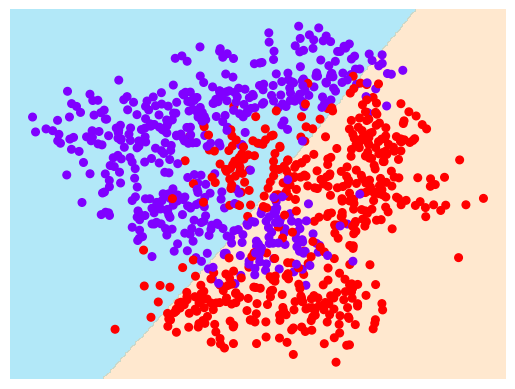

In [ ]:
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)
stdev = 0.075
num_clusters = 10
centroids = [[.5, .8], [.5, .1], [.3, .7], [.6, .6], [.1, .6], [.4, .5], [.4, .3], [.6, .4], [.2, .4], [.3, .1]]
data = [[np.random.normal(loc=centroids[i % num_clusters][0], scale=stdev),
         np.random.normal(loc=centroids[i % num_clusters][1], scale=stdev),
         (i % num_clusters) % 2] for i in range(1000)]
np.random.shuffle(data)
x1 = [x[0] for x in data if x[2] == '0']
x2 = [x[1] for x in data if x[2] == '0']
plt.scatter(x1, x2, color='orange')
x1 = [x[0] for x in data if x[2] == '1']
x2 = [x[1] for x in data if x[2] == '1']
df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
print(df.head())
X = df[['x1', 'x2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=my_seed, shuffle=True)

model = MLPClassifier(max_iter=1000, random_state=0)
model.fit(X_train.values, y_train.values)

y_predict = model.predict(X_test.values)
print('Accuracy: ', accuracy_score(y_test, y_predict))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

In constrast, this is not a good classifier.  How do we get a better fit to the data? By default, we are training with 100 units in a single "hidden layer" of the network feeding into the single output unit.  We could add more layers, more units, etc., but sometimes the problem is that we're underfitting because of the default "regularization" that seeks to simplify the model, penalizing a more sophisticated model.  The parameter ```alpha``` (default=0.0001) can be used to adjust the regularization:

Accuracy:  0.88


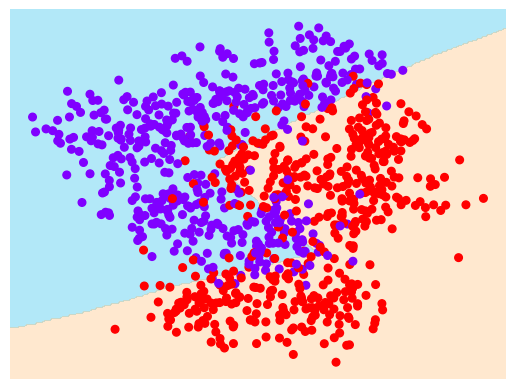

In [49]:
model = MLPClassifier(alpha=.00005, max_iter=10000, random_state=1)
model.fit(X_train.values, y_train.values)

y_predict = model.predict(X_test.values)
print('Accuracy: ', accuracy_score(y_test, y_predict))

visualize_classifier(model, X.values, y.values, ax = plt.gca())
plt.show()

You may note that my ```random_state``` parameter is not 0.  The result was poor for seed 0 and better (but not great) for seed 1.   Outcomes for NN learning can be highly variable, as training is a stochastic (random) search in a very high dimensional space of weights and bias parameters.  There are many local error minima, and it can be easy to have a network that _could_ express a function well, not achieve a good fit.

Let's see what happens when we leave parameters as defaults and distribute the 100 units across different layers of the network.

1 layer size(s): [100]
Accuracy:  0.798


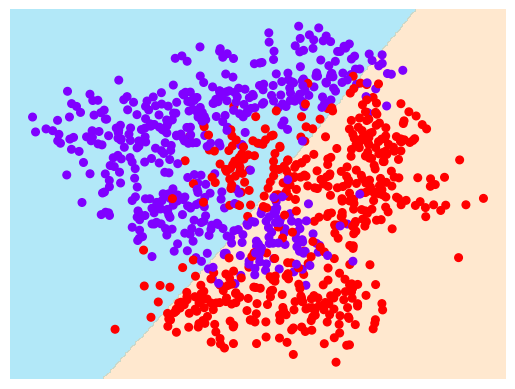

2 layer size(s): [50, 50]
Accuracy:  0.888


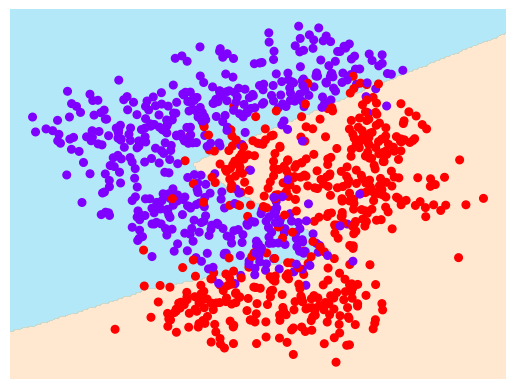

3 layer size(s): [34, 33, 33]
Accuracy:  0.888


4 layer size(s): [25, 25, 25, 25]
Accuracy:  0.89


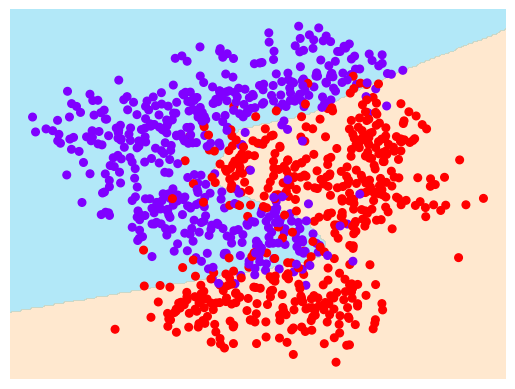

5 layer size(s): [20, 20, 20, 20, 20]
Accuracy:  0.892


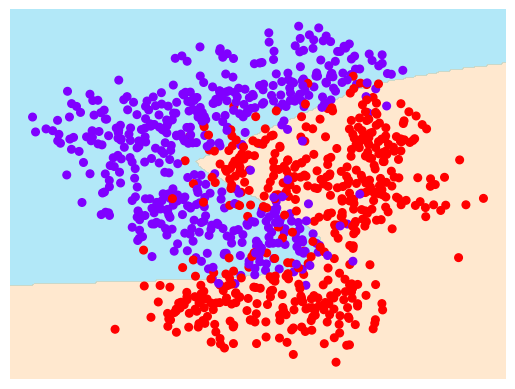

6 layer size(s): [20, 16, 16, 16, 16, 16]
Accuracy:  0.876


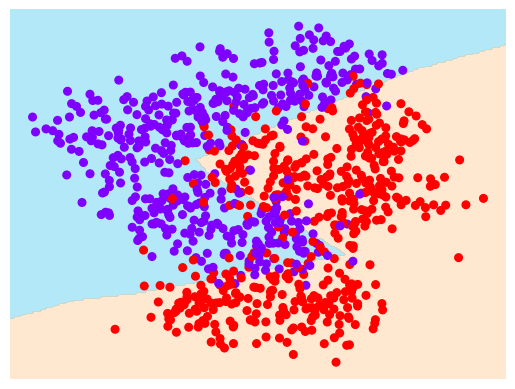

In [57]:
num_units = 100

for num_layers in range(1, 7):
    units_per_layer = num_units // num_layers
    layer_sizes = [units_per_layer] * num_layers
    layer_sizes[0] = layer_sizes[0] + (num_units - sum(layer_sizes))
    print(num_layers, 'layer size(s):', layer_sizes)
    model = MLPClassifier(hidden_layer_sizes=layer_sizes, max_iter=1000, random_state=0)
    model.fit(X_train.values, y_train.values)
    y_predict = model.predict(X_test.values)
    print('Accuracy: ', accuracy_score(y_test, y_predict))
    visualize_classifier(model, X.values, y.values, ax = plt.gca())
    plt.show()

Note the decline in accuracy beyond 5 layers.

## Regression

Neural Networks may also be applied to regression as well.  Let us observe the result of applying the [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to a degree 4 polynomial regression dataset.


c:\Users\tneller\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


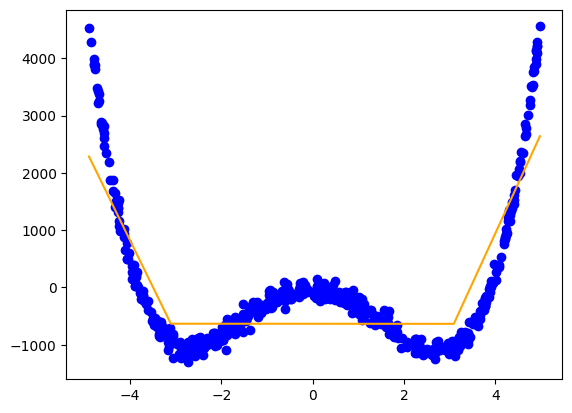

Training R^2: 0.804950546302012


In [ ]:
df = pd.read_csv('degree-4-regression.csv', index_col='id')

X = df[['x']]  # select input(s)
y = df['y']  # select output

# As before, we will split our datasets into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=my_seed, shuffle=True)

model = MLPRegressor(max_iter=10000, random_state=0)
model.fit(X_train, y_train)

Xfit = pd.DataFrame()
Xfit['x'] = np.linspace(start=X['x'].min(), stop=X['x'].max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
yfit = model.predict(Xfit)  # predict y's from the linearly spaced x data
plt.scatter(X['x'], y, color='blue')  # scatter plot of original data
plt.plot(Xfit['x'], yfit, color='orange');  # line plot showing fit of learned quartic function
plt.show()

# Print the R^2 score of the model on the training and testing data
print('Training R^2:', model.score(X_train, y_train))
print('Testing R^2:', model.score(X_test, y_test))


After 10000 iterations, the single 100-unit layer NN hasn't converged.  Observe the difference with two 50-unit layers.

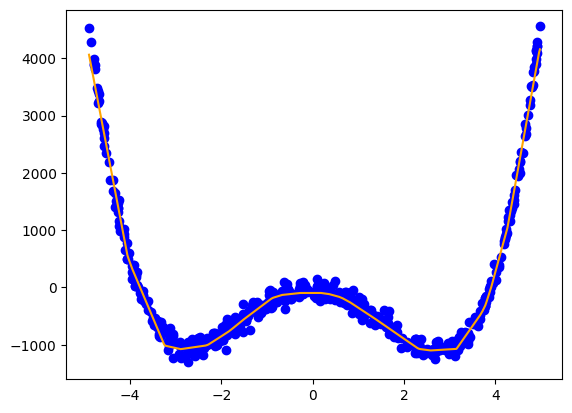

Training R^2: 0.9921486262713797
Testing R^2: 0.9893945893426996


In [66]:
model = MLPRegressor(hidden_layer_sizes=(50, 50,), max_iter=10000, random_state=0)
model.fit(X_train, y_train)

Xfit = pd.DataFrame()
Xfit['x'] = np.linspace(start=X['x'].min(), stop=X['x'].max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
yfit = model.predict(Xfit)  # predict y's from the linearly spaced x data
plt.scatter(X['x'], y, color='blue')  # scatter plot of original data
plt.plot(Xfit['x'], yfit, color='orange');  # line plot showing fit of learned quartic function
plt.show()

# Print the R^2 score of the model on the training and testing data
print('Training R^2:', model.score(X_train, y_train))
print('Testing R^2:', model.score(X_test, y_test))

This is much-improved.  Let's see what happens when we make 4 layers of 25 units each.

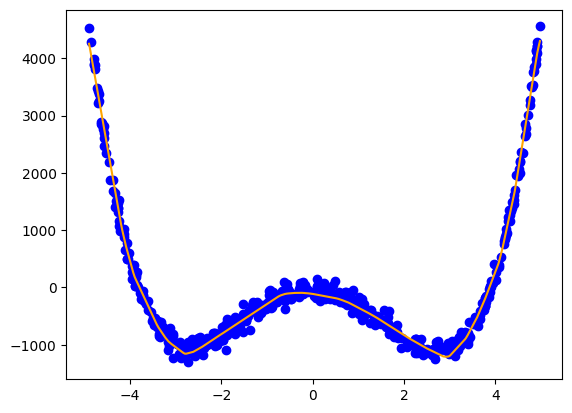

Training R^2: 0.9926498103098202
Testing R^2: 0.9916555968901973


In [67]:
model = MLPRegressor(hidden_layer_sizes=(25, 25, 25, 25,), max_iter=10000, random_state=0)
model.fit(X_train, y_train)

Xfit = pd.DataFrame()
Xfit['x'] = np.linspace(start=X['x'].min(), stop=X['x'].max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
yfit = model.predict(Xfit)  # predict y's from the linearly spaced x data
plt.scatter(X['x'], y, color='blue')  # scatter plot of original data
plt.plot(Xfit['x'], yfit, color='orange');  # line plot showing fit of learned quartic function
plt.show()

# Print the R^2 score of the model on the training and testing data
print('Training R^2:', model.score(X_train, y_train))
print('Testing R^2:', model.score(X_test, y_test))

This is better still.  Next we compare this performance with the performance of fitting a degree-4 polynomial to the noisy data, the actual underlying model. 

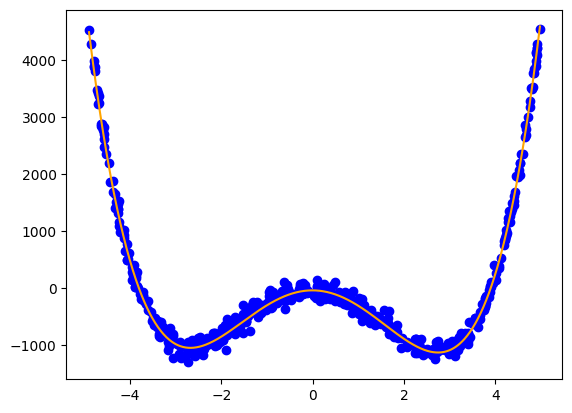

Training R^2: 0.9938856785742267
Testing R^2: 0.9936193005983749


In [68]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()

# Create a new X_train_poly matrix with columns for a degree-4 polynomial
X_train_poly = PolynomialFeatures(degree=4).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=4).fit_transform(X_test)
model.fit(X_train_poly, y_train)

Xfit = pd.DataFrame()
Xfit['x'] = np.linspace(start=X['x'].min(), stop=X['x'].max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
Xfit_poly = PolynomialFeatures(degree=4).fit_transform(Xfit)
yfit = model.predict(Xfit_poly)  # predict y's from the linearly spaced x data
plt.scatter(X['x'], y, color='blue')  # scatter plot of original data
plt.plot(Xfit['x'], yfit, color='orange');  # line plot showing fit of learned quartic function
plt.show()

# Print the R^2 score of the model on the training and testing data
print('Training R^2:', model.score(X_train_poly, y_train))
print('Testing R^2:', model.score(X_test_poly, y_test))

Thus we see that an MLPRegressor does a very good approximation of optimal modeling of this simple data.

We can see that every design choice, from maximum number of iterations, to the size and depth of the NN architecture can have a significant impact, and this is just scratching the surface of the [many parameters we could tune for regression](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) or [classification](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

Neural network learning is often allocated its very own course in order to allow for understanding of the many different dimensions of the NN design space.  For now, it suffices for you to get an experiential taste of this family of models, and gain an understanding of the pros and cons.  Generally speaking, we want to use the simplest, most interpretable model that meets our performance criteria.

One final note: Neural network libraries have risen and fallen in popularity.  [Tensorflow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/) have long been popular for different reasons.  There are even algorithms that seek to automate NN experimentation and network architecture design (e.g. [AutoML and Neural Architecture Search](https://towardsdatascience.com/everything-you-need-to-know-about-automl-and-neural-architecture-search-8db1863682bf)) that take common design process templates and seek to automate the tuning of practitioners.  In all tools, there will be tradeoffs of simplicity of use versus freedom of design and fine-grained control of learning.

It will be well worth your time to gain greater experience with more popular tools.  For example, look at these examples of [PyTorch regression](https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379).

### Generative Neural Networks

**Generative neural networks** are a class of machine learning models designed to generate new data samples that resemble a given training dataset. By learning the underlying patterns and structures of the data, these models can produce realistic and novel outputs in various domains. Prominent types of generative neural networks include **[Generative Adversarial Networks (GANs)](https://en.wikipedia.org/wiki/Generative_adversarial_network)**, which consist of two competing networks that learn to generate and discriminate data, and **[Variational Autoencoders (VAEs)](https://en.wikipedia.org/wiki/Autoencoder#Variational_autoencoder_(VAE))**, which encode input data into a latent space (i.e. a learned, lower-dimensional, compressed representation of inputs) and decode it back to generate new samples. These models have been successfully applied to tasks such as image synthesis, music composition, and data augmentation.

A significant advancement in the field of generative models is the development of [**large language models**(https://en.wikipedia.org/wiki/Large_language_model)] (LLMs), neural networks trained on massive amounts of textual data to understand and generate human-like language. At time of writing, **[GPT-4](https://en.wikipedia.org/wiki/GPT-4)** by OpenAI is a popular LLM. These models leverage architectures like the **[Transformer](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model))** to capture long-range dependencies in text, enabling them to perform tasks in **[Natural Language Processing (NLP)](https://en.wikipedia.org/wiki/Natural_language_processing)** such as translation, summarization, and conversational response generation. The ability of large language models to generate coherent and contextually relevant text has opened new avenues in AI research and applications, showcasing the potential of generative neural networks in understanding and creating complex data.  

In fact, these two paragraphs were edited from source verbiage generated by OpenAI's ChatGPT o1-preview LLM from my prompt, "Provide a markdown format, two-paragraph, college level introduction to the topic of generative neural networks with specific mention of large language models.  (This will be followed by a brief overview of transformers.)"

Whereas our multilayer feed-forward networks above were limited to a relatively simple architecture of layered artificial neurons, different applications draw upon unique layers and architectures to achieve their purposes.  An LLM (Large Language Model) takes textual input and generates output by predicting the most probable continuation of the text, optimizing for coherence and relevance based on patterns learned from extensive language data.  Popular LLMs make use of decoder-only transformer-based architectures. 

#### [Transformers](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture))

Transformers serve large language models (LLMs) by efficiently handling sequential data and capturing long-range dependencies in text. They achieve this through a mechanism called **self-attention**, which allows the model to weigh the relevance of different words in a sentence relative to each other. When generating responses, the transformer processes the input text through multiple layers of self-attention and feed-forward neural networks, effectively forming representations of context and semantics. This enables the LLM to predict and generate coherent and contextually appropriate continuations of the input text, such as an answer to a query.

Before deployment, the key components trained are the **embedding layer**, the **transformer layers** (which include multi-head self-attention and feed-forward networks), and the **unembedding (output) layer**. Training involves feeding vast amounts of text data into the model and optimizing it to predict the next word in a sentence, a process known as **language modeling**. This training adjusts the model's parameters to minimize prediction errors, effectively teaching it the structures and patterns of language. 

In early AI efforts towards natural language processing (NLP), those from the logicist tradition assumed that one would achieve NLP goals by manually encoding the patterns and rules of language.  In the 21st century, we have crossed a significant phase-transition where memory capacity, computational efficiency, and the availability of vast sources of natural language data has brought *statistical* and *ML* approaches to prominence in NLP. 

##### Components of Transformer Architecture:

- **Tokenizer**: Converts raw text input into a sequence of tokens (words, subwords, or characters) that the model can process.
- **Embedding Layer**: Transforms tokens into continuous vector representations (embeddings) that capture semantic meaning.
- **Transformer Layers**:
  - **Multi-Head Self-Attention**: Enables the model to attend to different positions in the input sequence, capturing relationships between words regardless of their distance apart.
  - **Feed-Forward Neural Networks**: Applies non-linear transformations to the attention outputs, allowing complex feature extraction and pattern learning.
- **Un-embedding Layer (Output Layer)**: Maps the final hidden states back to the token vocabulary, producing probabilities for each possible next token to generate or predict text.

It is tempting to jump to a conclusion that transformers "understand" language.  This relates to philosophical debates such as [John Searles's Chinese room argument](https://en.wikipedia.org/wiki/Chinese_room).  In using LLMs, it is important to understand that they are essentially highly-sophisticated statistical parrots.  They "parrot" back tokens learned from enormous amounts of training data such that those tokens in sequence are most likely those expected or desired by the user.   In creating these materials, I have observed the usual pitfalls of LLMs:

- Citing research data sources and studies that simply do not exist
- Referencing magazine articles never written
- Generating "fictional" code that imagines a non-existent repository of data
- Confident declaration of incorrect mathematical constraints
- Blathering on redundantly on a topic when not given a word budget in the prompt

and so on.  That said, like other generative AI, I have found it to be an accelerant of and aid to my productivity:

- While using ChatGPT o1-mini to suggest good, publicly-available, real-world datasets, I have debunked about half, yet I've been introduced to excellent actual datasets I was previously unaware of. 
- Generative AI for coding (GitHub Copilot) has accelerated coding most when I've provided a good starting context and it can predict what will be mirrored in successive examples.
- ChatGPT o1-mini, while forgetting Markdown conventions for surrounding LaTeX mathematical formula typesetting ($ and $$ pairs), it has nonetheless been very satisfying to quickly generate desired LaTeX typesetting with minimal corrections needed. 

The experience is like having a co-authors that is currently less competent, but types really fast.  Programming with Copilot is akin to Pair Programming as a navigator with a lightning-fast driver at the keyboard.   In both cases, careful review and much revision is often needed, but the net helpfulness to the process is undeniable.

[activity]





## Licensing and Attribution

Author: [Todd W. Neller](http://cs.gettysburg.edu/~tneller) aided by ChatGPT o1-preview and GitHub Copilot

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).